# Titanic Dataset – Exploratory Data Analysis (EDA)
#### By: Patel Manthan


## 🔰  Importing Libraries

In [2]:
import pandas as pd              
import numpy as np          
import matplotlib.pyplot as plt 
import seaborn as sns             
import missingno as msno         
import warnings                 

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')        


## 📂 Loading the Datasets

In [4]:

train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')
gender_sub = pd.read_csv('Dataset/gender_submission.csv')


## 🔍  Previewing the Datasets

In [8]:
# Display the first 5 rows
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# Display basic information about the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# Checking for missing values in training data
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 🧩  Combining Train and Test Datasets for Comprehensive EDA

In [15]:
# Add a 'source' column to distinguish between train and test
train['source'] = 'train'
test['source'] = 'test'
test['Survived'] = np.nan

# Concatenate both datasets 
combined = pd.concat([train, test], ignore_index=True)
combined.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,source
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


## 🧼  Missing Value Analysis & Treatment

### 🔍 Check Missing Values (in % and counts)

In [19]:
# Calculate total and percentage of missing values in each column
missing_count = combined.isnull().sum()
missing_percent = (missing_count / combined.shape[0]) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_count,
    'Percentage': missing_percent.round(2)
}).sort_values(by='Percentage', ascending=False)

missing_df


,Missing Values,Percentage
Cabin,1014,77.46
Survived,418,31.93
Age,263,20.09
Embarked,2,0.15
Fare,1,0.08
PassengerId,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
SibSp,0,0.00


### 📊  Visualize Missing Values

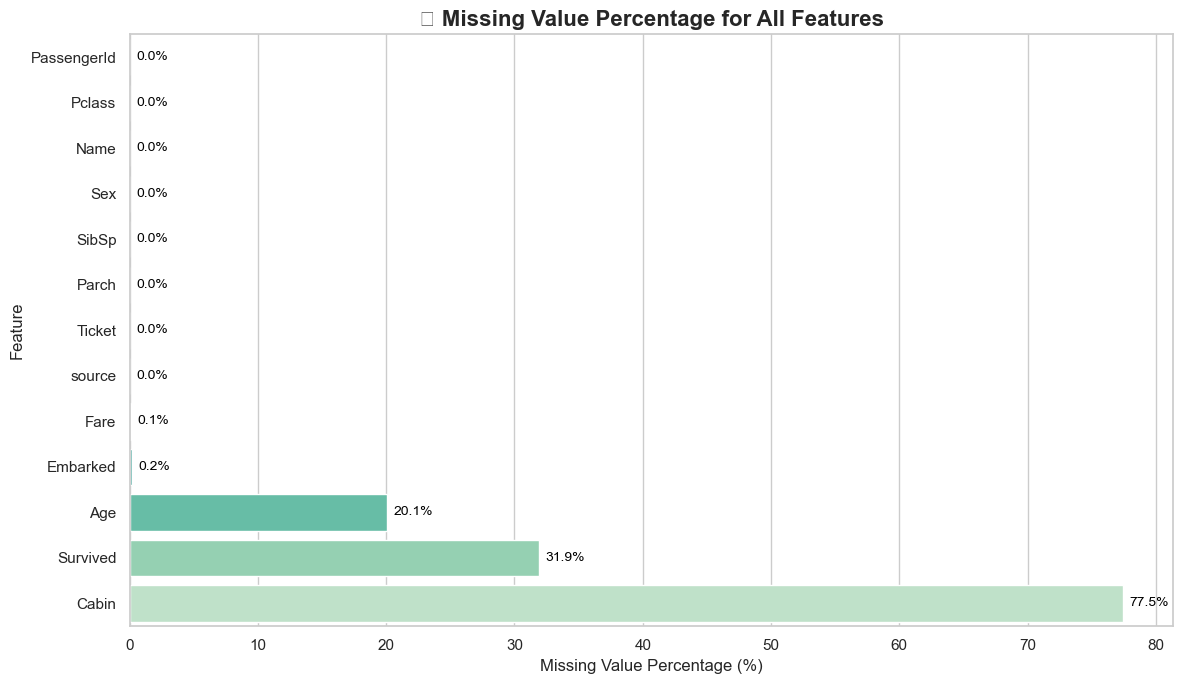

In [22]:
#  Get all features and calculate missing %
all_features = combined.columns
missing = combined.isnull().sum()
missing_percent = (missing / len(combined)) * 100

missing_percent = missing_percent[all_features].sort_values(ascending=True)

# Plot with all features (including 0%)
plt.figure(figsize=(12, 7))
sns.set_theme(style="whitegrid")
colors = sns.color_palette("mako", len(missing_percent))

sns.barplot(
    x=missing_percent.values,
    y=missing_percent.index,
    palette=colors
)

for index, value in enumerate(missing_percent):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center', fontsize=10, color='black')

plt.title('📊 Missing Value Percentage for All Features', fontsize=16, fontweight='bold')
plt.xlabel('Missing Value Percentage (%)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()


### 🔧 Handle Missing Values

In [25]:
# Fill Embarked with most frequent value
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True)

# Fill Fare with median
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)

# Fill Age with median
combined['Age'].fillna(combined['Age'].median(), inplace=True)

# For Cabin, extract only deck letter if present, else mark as 'M' for missing
combined['Deck'] = combined['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')


In [27]:
combined.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
source            0
Deck              0
dtype: int64

## 📈  Univariate Analysis (One Feature at a Time)

### 🔢 Numerical Features

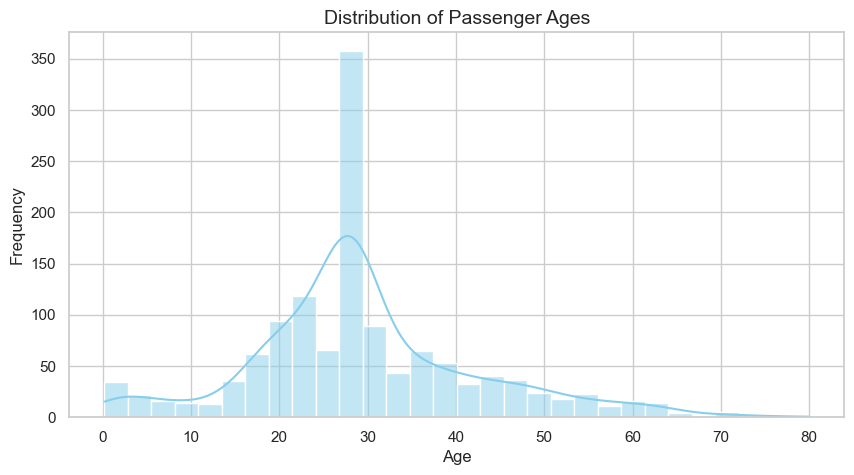

In [31]:
plt.figure(figsize=(10, 5))
sns.histplot(data=combined, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Passenger Ages', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### 📊  Fare Distribution

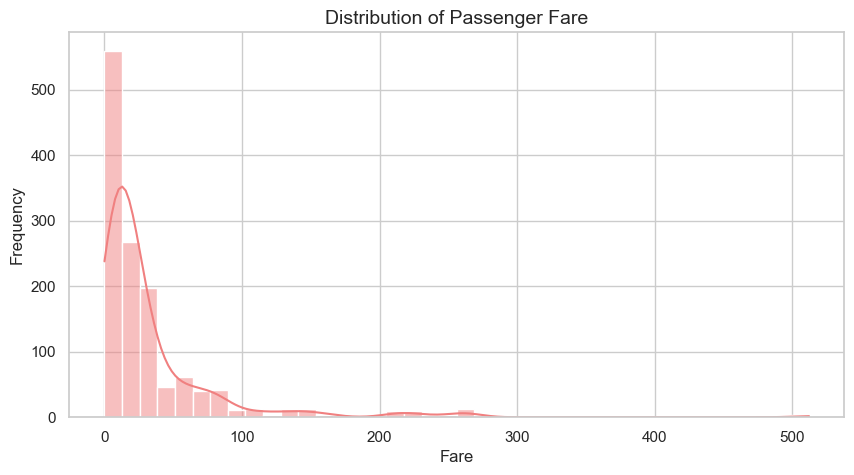

In [34]:
plt.figure(figsize=(10, 5))
sns.histplot(data=combined, x='Fare', bins=40, kde=True, color='lightcoral')
plt.title('Distribution of Passenger Fare', fontsize=14)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


#### 📊  SibSp (Siblings/Spouses aboard)

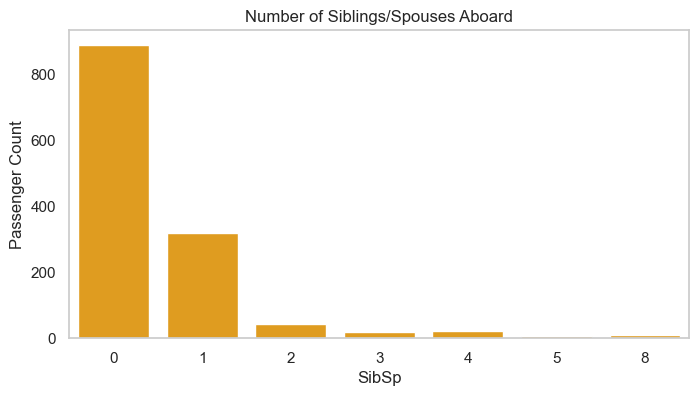

In [37]:
plt.figure(figsize=(8, 4))
sns.countplot(data=combined, x='SibSp', color='orange')
plt.title('Number of Siblings/Spouses Aboard')
plt.xlabel('SibSp')
plt.ylabel('Passenger Count')
plt.grid(axis='y')
plt.show()


#### 📊  Parch (Parents/Children aboard)

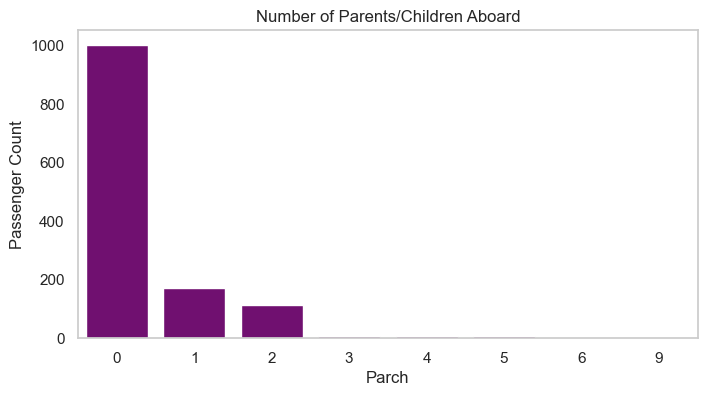

In [40]:
plt.figure(figsize=(8, 4))
sns.countplot(data=combined, x='Parch', color='purple')
plt.title('Number of Parents/Children Aboard')
plt.xlabel('Parch')
plt.ylabel('Passenger Count')
plt.grid(axis='y')
plt.show()


### 🔠  Categorical Features

#### 📊 Passenger Class Distribution

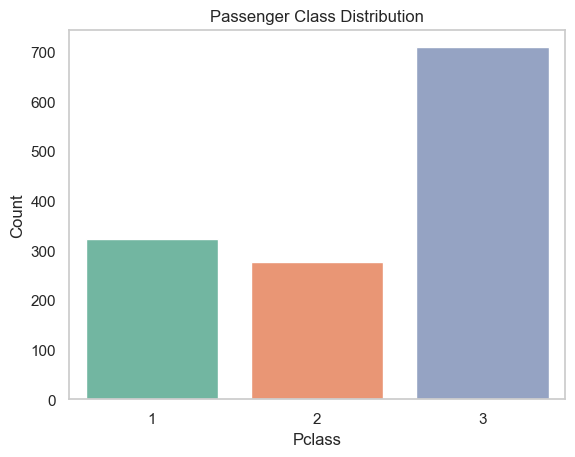

In [44]:
sns.countplot(data=combined, x='Pclass', palette='Set2')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


#### 📊 6.2.2 Gender Distribution

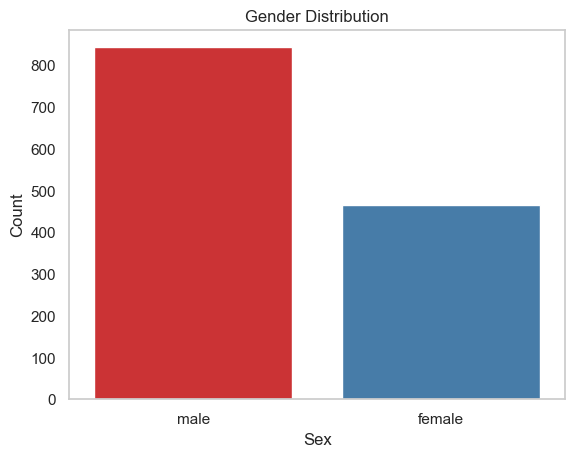

In [47]:
sns.countplot(data=combined, x='Sex', palette='Set1')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


#### 📊 Embarked Port Distribution

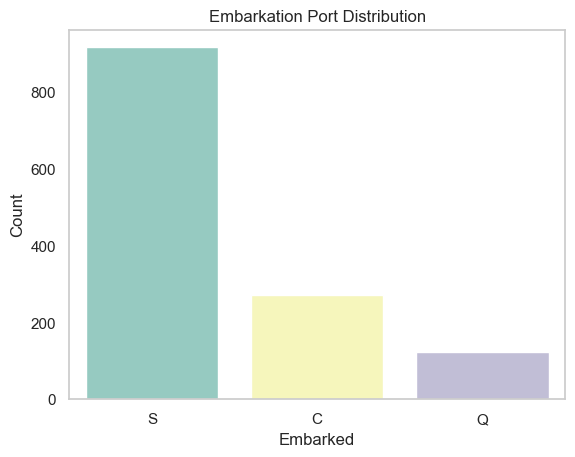

In [50]:
sns.countplot(data=combined, x='Embarked', palette='Set3')
plt.title('Embarkation Port Distribution')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


#### 📊  Deck Distribution (from Cabin)

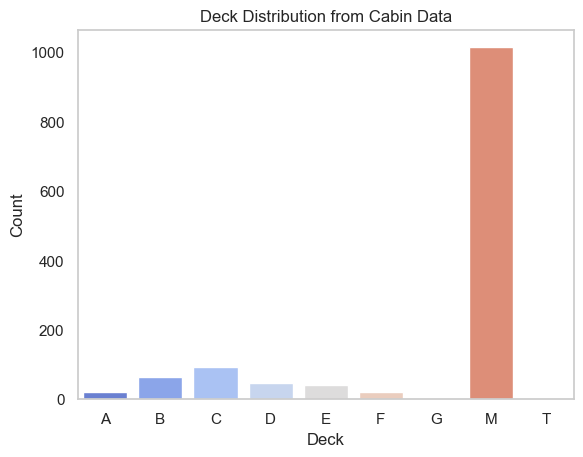

In [53]:
sns.countplot(data=combined, x='Deck', order=sorted(combined['Deck'].unique()), palette='coolwarm')
plt.title('Deck Distribution from Cabin Data')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


## 📊  Bivariate Analysis (Survived vs Other Features)

In [56]:
# Filter only training data with known survival status
train = combined[combined['source'] == 'train']

### 💙  Survival by Gender

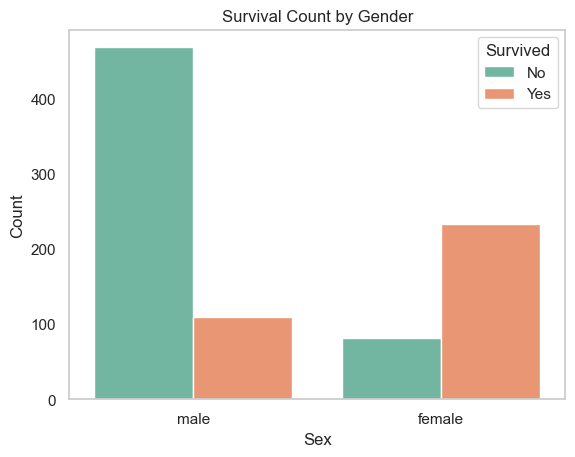

In [59]:
sns.countplot(data=train, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()


### 🏷  Survival by Passenger Class

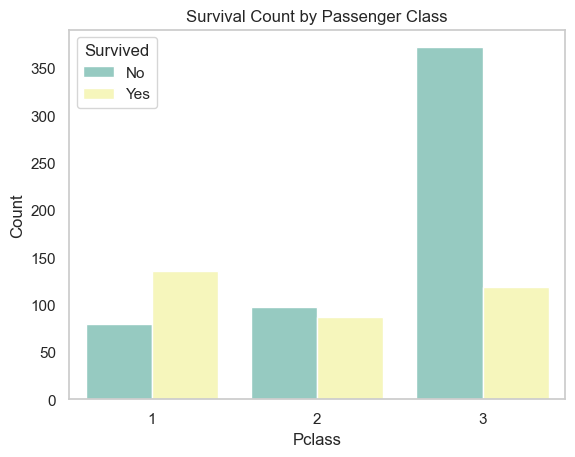

In [62]:
sns.countplot(data=train, x='Pclass', hue='Survived', palette='Set3')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()


### 🧒 Survival by Age (Using KDE Plots)

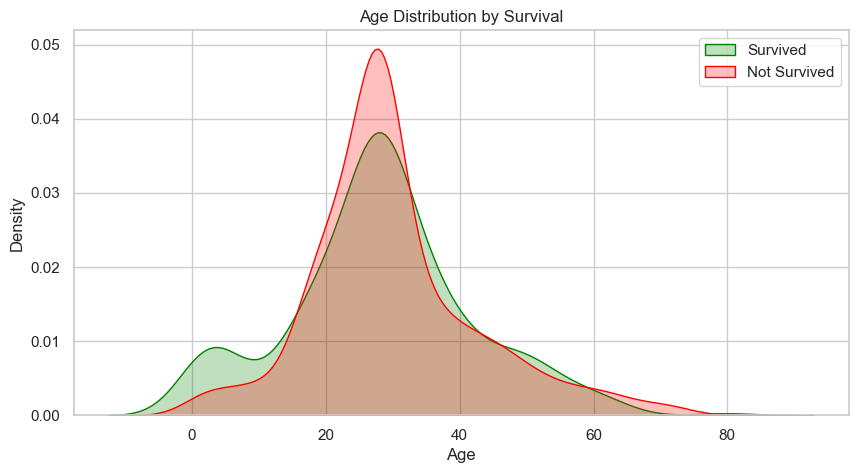

In [65]:
plt.figure(figsize=(10,5))
sns.kdeplot(data=train[train['Survived'] == 1], x='Age', shade=True, label='Survived', color='green')
sns.kdeplot(data=train[train['Survived'] == 0], x='Age', shade=True, label='Not Survived', color='red')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


### 🎫 Survival by Fare (Box Plot)

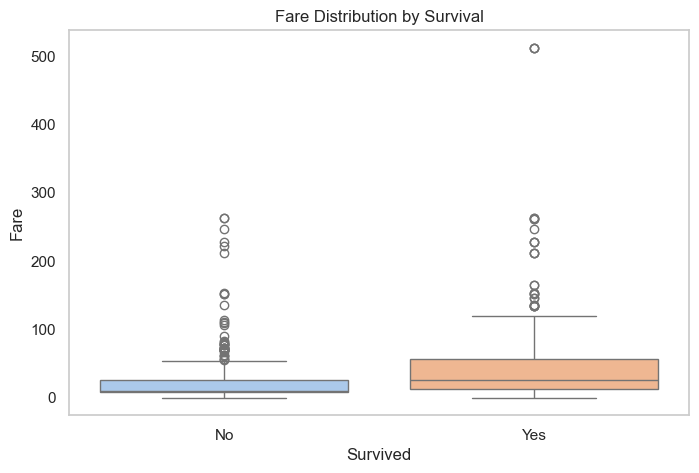

In [69]:
plt.figure(figsize=(8,5))
sns.boxplot(data=train, x='Survived', y='Fare', palette='pastel')
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y')
plt.show()


### ⚓ Survival by Embarked Port

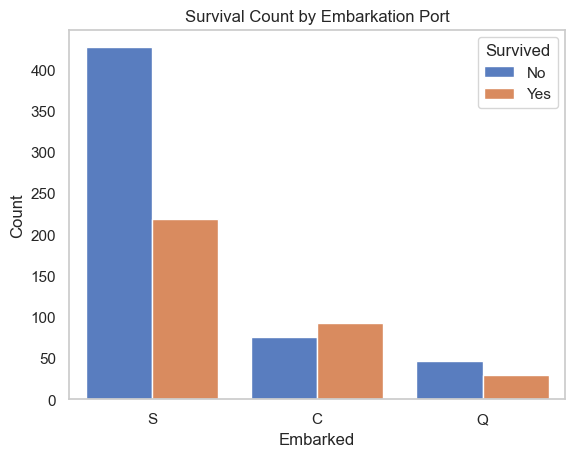

In [72]:
sns.countplot(data=train, x='Embarked', hue='Survived', palette='muted')
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()


### 🧱 Survival by Deck

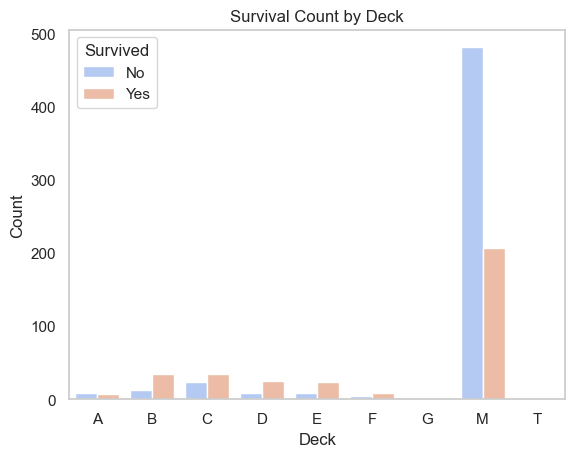

In [75]:
sns.countplot(data=train, x='Deck', hue='Survived', palette='coolwarm', order=sorted(train['Deck'].unique()))
plt.title('Survival Count by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.grid(axis='y')
plt.show()


## 🔥 Multivariate Analysis (Multiple Variables Together)

### 📊  Correlation Matrix (Heatmap)

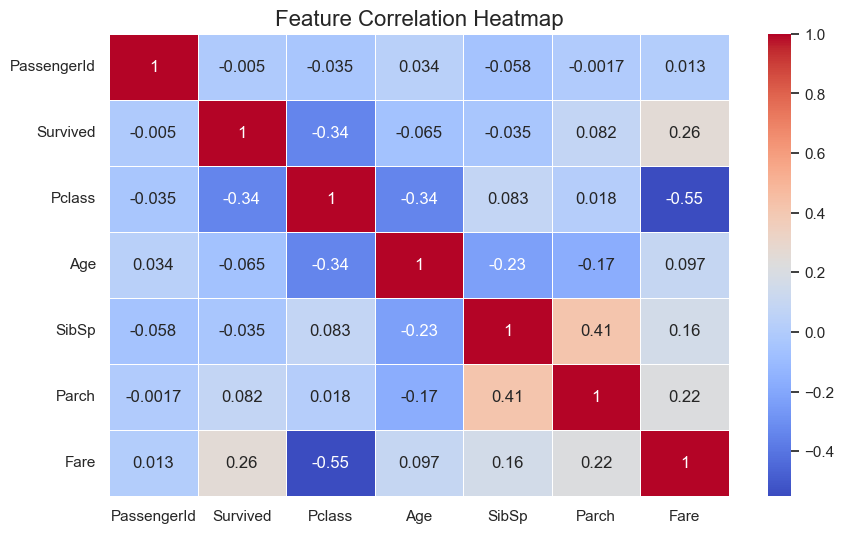

In [79]:
# Select only numeric features for correlation
numeric_features = train.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()


### 🧩 Pairplot with Key Features

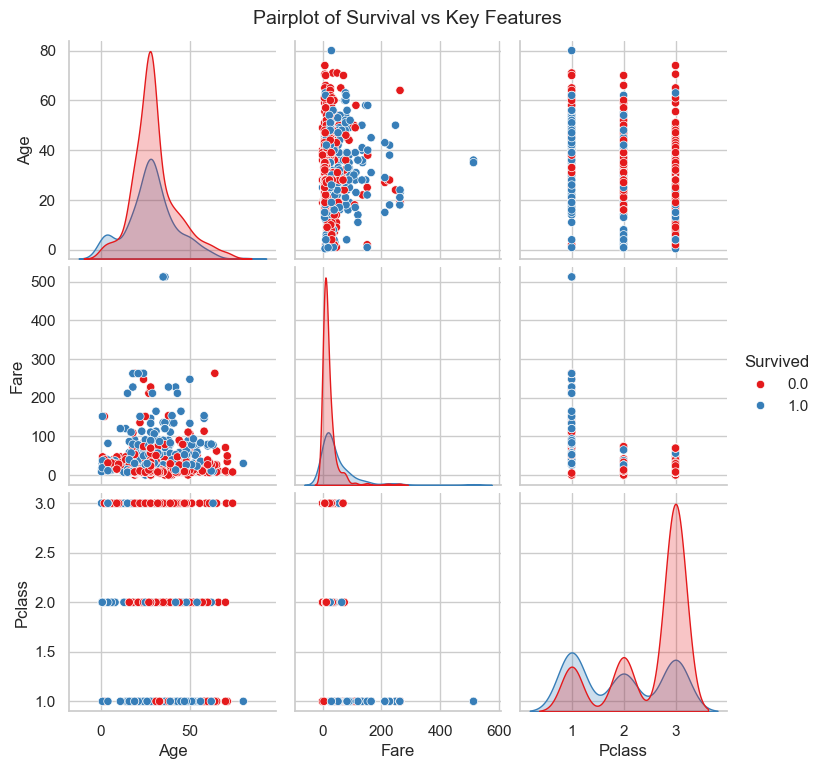

In [82]:
sns.pairplot(train[['Survived', 'Age', 'Fare', 'Pclass']], hue='Survived', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Survival vs Key Features', y=1.02, fontsize=14)
plt.show()


### 🧱 Heatmap of Survival Rates by Pclass & Sex

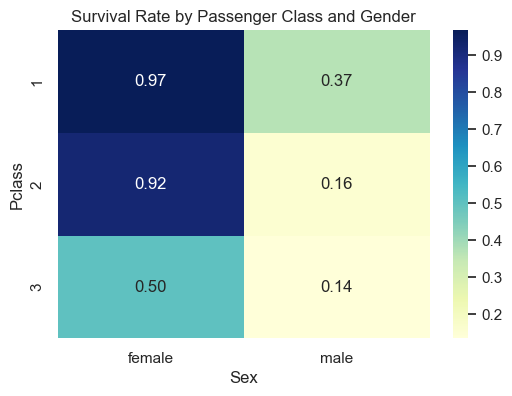

In [84]:
# Create pivot table of survival rates
pivot = train.pivot_table(index='Pclass', columns='Sex', values='Survived')

# Plot as heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Survival Rate by Passenger Class and Gender')
plt.show()


### 🧪 Violinplot to Show Distribution + Survival

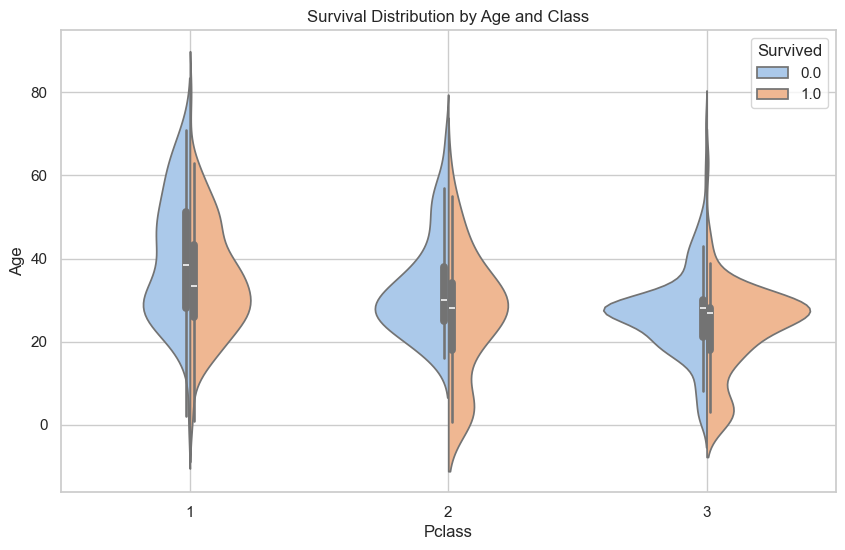

In [88]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=train, x='Pclass', y='Age', hue='Survived', split=True, palette='pastel')
plt.title('Survival Distribution by Age and Class')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.grid(True)
plt.show()


## 🛠️ Feature Engineering (Creating Powerful New Features)

###  🔹Family Size = SibSp + Parch + You

In [92]:
# Total number of family members onboard (self included)
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1


### 🔹 IsAlone = 1 if FamilySize == 1

In [95]:
# Flag if passenger is traveling alone
combined['IsAlone'] = 0
combined.loc[combined['FamilySize'] == 1, 'IsAlone'] = 1


### 🔹  Extract Title from Name

In [98]:
# Extract title using regex from Name
combined['Title'] = combined['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [100]:
# Combine rare titles under 'Rare'
combined['Title'] = combined['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

# Standardize similar titles
combined['Title'] = combined['Title'].replace(['Mlle', 'Ms'], 'Miss')
combined['Title'] = combined['Title'].replace('Mme', 'Mrs')


In [102]:
combined['Title'].value_counts()


Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64

###  🔹 Optional: Age Bins (e.g. Child, Teen, Adult, Senior)

In [105]:
combined['AgeBin'] = pd.cut(combined['Age'], bins=[0, 12, 18, 35, 60, 80], 
                            labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])


###  🔹 Optional: Fare Bins

In [108]:
combined['FareBin'] = pd.qcut(combined['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very_High'])


In [110]:
combined[['FamilySize', 'IsAlone', 'Title', 'AgeBin', 'FareBin']].head()


,FamilySize,IsAlone,Title,AgeBin,FareBin
0,2,0,Mr,YoungAdult,Low
1,2,0,Mrs,Adult,Very_High
2,1,1,Miss,YoungAdult,Medium
3,2,0,Mrs,YoungAdult,Very_High
4,1,1,Mr,YoungAdult,Medium


## Visualize

###  Survival Rate by Title

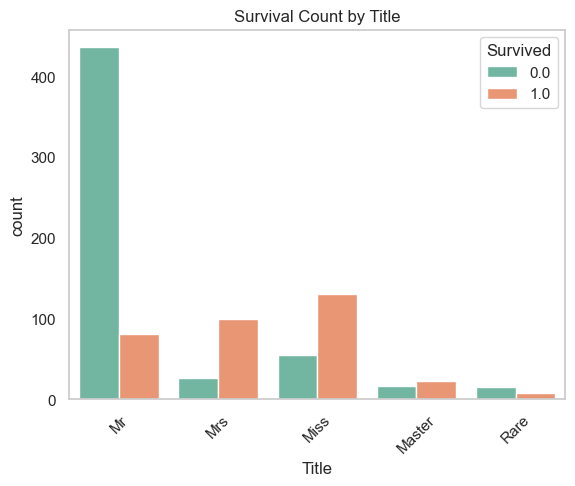

In [114]:
sns.countplot(data=combined[combined['source']=='train'], x='Title', hue='Survived', palette='Set2')
plt.title('Survival Count by Title')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Survival by Family Size

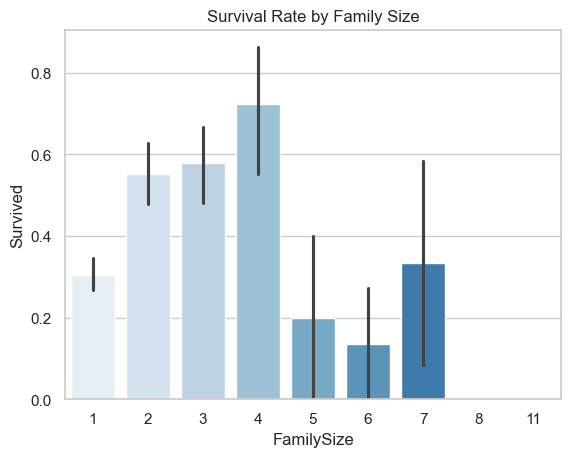

In [117]:
sns.barplot(data=combined[combined['source']=='train'], x='FamilySize', y='Survived', palette='Blues')
plt.title('Survival Rate by Family Size')
plt.show()


###  IsAlone vs Survival

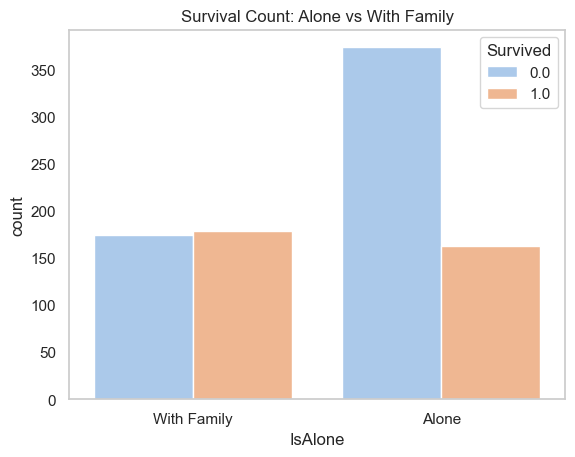

In [120]:
sns.countplot(data=combined[combined['source']=='train'], x='IsAlone', hue='Survived', palette='pastel')
plt.title('Survival Count: Alone vs With Family')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.grid(axis='y')
plt.show()


## ✅  Summary of Findings + Optional Prediction

### 📌 Summary of Key Findings

- 🎯 **Sex vs Survival**: Females had a significantly higher survival rate than males.
- 💰 **Fare vs Survival**: Passengers who paid higher fares were more likely to survive.
- 🏷️ **Pclass vs Survival**: 1st class passengers had the best survival rate; 3rd class the worst.
- 👨‍👩‍👧‍👦 **FamilySize**: Those traveling alone had lower survival rates.
- 👶 **Age**: Children had a higher survival rate; middle-aged adults saw more casualties.
- 🧱 **Deck**: Decks B, D, and E had higher survival rates; these often housed 1st class passengers.
- 🚢 **Embarked**: Port ‘C’ passengers had higher survival rates than those from ‘S’ or ‘Q’.
- 🧠 **Title (from Name)**: Social titles revealed insights — “Miss” and “Mrs” survived more than “Mr”.

✅ Feature engineering (FamilySize, IsAlone, Title, AgeBin) added valuable patterns to enhance modeling or story-building.


##  Simple Rule-Based Prediction

In [ ]:
# Recreate test set from combined
test_data = combined[combined['source'] == 'test'].copy()

# Simple rule: female = survive, male = not survive
test_data['Survived'] = 0  # default: not survived
test_data.loc[test_data['Sex'] == 'female', 'Survived'] = 1


## 📤 Create Submission File

In [ ]:
# Save predictions in submission format
submission = test_data[['PassengerId', 'Survived']]
submission.to_csv('simple_gender_submission.csv', index=False)
